In [37]:
import numpy as np

# Constants
N = 100  # Number of time steps
b = 1.0  # Cost coefficient for using control
c = 10.0  # Penalty for hitting the wall
d_minus = np.array([-1.0, 0.0, 2.0, 1.0])  # Lower bounds of doors
d_plus = np.array([0.0, 1.0, 3.0, 2.0])    # Upper bounds of doors
t = np.array([25, 50, 75, 100])  # Times when doors are checked

# State space: positions from -5 to 5
state_space = np.linspace(-5, 5, 100)

def is_outside_doors(X_s, s):
    tmp = [0] + list(t) + [max(t)]
    for i, j, a, b in zip(tmp[:-1], tmp[1:], d_minus, d_plus):
        if a <= X_s <= b and i <= s <= j:
            return False
    return True

def cost_function(X_s, u_s, s):
    penalty = c if is_outside_doors(X_s, s) else 0
    return b * u_s**2 + penalty


to_state = lambda x: np.argmin((state_space-x)**2)

def value_iteration():
    V = np.zeros((N + 1, len(state_space)))
    policy = np.zeros((N + 1, len(state_space)))
    # X = []
    for n in range(N - 1, -1, -1):
        for s_idx, X_n in enumerate(state_space):
            min_cost = float('inf')
            best_action = None
            
            for u_n in np.linspace(-2, 2, 40):
                X_next = max(min(X_n + u_n + np.random.normal(0, 1/10), 5), -5)
                cost = cost_function(X_n, u_n, n) + V[n + 1][to_state(X_next)]
                if cost < min_cost:
                    min_cost = cost
                    best_action = u_n
                    # best_x = to_state(X_next)
            # our_policy[n] = best_x
            V[n][s_idx] = min_cost
            policy[n][s_idx] = best_action
    
    return V, policy

# Run value iteration
value_function, optimal_policy = value_iteration()

# Display results
for n in range(N):
    print(f"Time step {n}: Optimal Policy: {optimal_policy[n]}, Value: {value_function[n]}")

Time step 0: Optimal Policy: [ 1.17948718  1.17948718  2.          1.8974359   1.79487179  1.79487179
  1.79487179  1.69230769  1.58974359  1.38461538  1.38461538  1.28205128
  1.28205128  1.07692308  0.87179487  0.97435897  0.66666667  0.97435897
  0.97435897  0.76923077  0.87179487  1.79487179  1.58974359  1.79487179
  1.48717949  1.58974359  1.38461538  1.28205128  1.17948718  1.17948718
  0.97435897  0.87179487  0.76923077  0.66666667  0.66666667  0.35897436
  0.25641026  0.35897436  0.15384615  0.15384615 -0.05128205 -0.05128205
 -0.05128205 -0.05128205 -0.05128205 -0.05128205 -0.05128205 -0.05128205
 -0.05128205 -0.05128205  0.05128205  0.05128205 -0.35897436 -0.35897436
 -0.35897436 -0.66666667 -0.76923077 -0.87179487 -0.87179487 -0.97435897
 -1.07692308 -1.17948718 -1.17948718 -1.38461538 -1.48717949 -1.58974359
 -1.69230769 -1.69230769 -1.8974359  -2.         -1.07692308 -0.87179487
 -1.17948718 -1.28205128 -1.28205128 -1.48717949 -1.38461538 -1.58974359
 -1.58974359 -1.897435

Time step 91: Optimal Policy: [ 1.48717949  1.69230769  1.58974359  2.          2.          1.8974359
  1.69230769  1.69230769  1.79487179  1.79487179  1.69230769  1.28205128
  1.8974359   1.28205128  1.48717949  1.48717949  1.28205128  1.17948718
  2.          2.          0.76923077  2.          2.          2.
  1.79487179  1.79487179  1.8974359   1.8974359   1.38461538  1.17948718
  1.58974359  1.48717949  1.48717949  1.38461538  1.07692308  0.97435897
  0.97435897  0.87179487  1.07692308  1.8974359   0.46153846  1.8974359
  1.69230769  1.58974359  1.48717949  1.69230769  1.38461538  1.38461538
  1.28205128  0.97435897  0.87179487  0.76923077  0.66666667  0.66666667
  0.66666667  0.56410256  0.35897436  0.15384615  0.05128205  0.15384615
  0.05128205  0.05128205  0.05128205  0.05128205  0.05128205  0.05128205
  0.05128205 -0.05128205 -0.05128205  0.05128205 -0.15384615 -0.25641026
 -0.25641026 -0.46153846 -0.46153846 -0.56410256 -0.56410256 -0.87179487
 -0.76923077 -0.97435897 -1.179

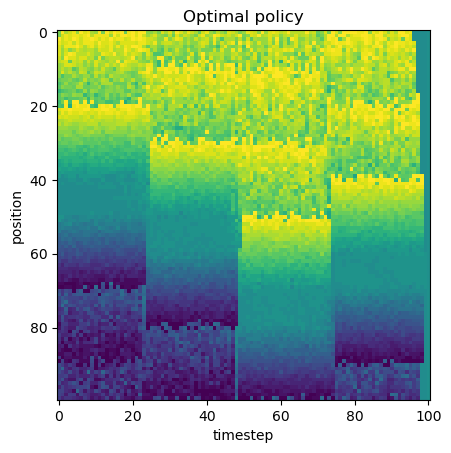

In [43]:
import matplotlib.pyplot as plt

plt.title("Optimal policy")
plt.imshow(optimal_policy.T)
plt.xlabel("timestep")
plt.ylabel("position")
plt.show()

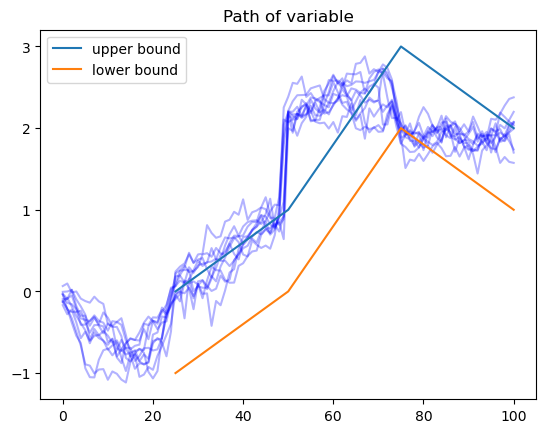

In [41]:
def simulate(policy): 
    W = np.random.normal(0, 1/10, policy.shape[0])
    X = 0
    path = []
    for i, wt in zip(range(policy.shape[0]), W):
        u = policy[i][to_state(X)]
        X = X + u + wt
        path.append(X)
    return path

for i in range(10):
    path = simulate(optimal_policy)
    plt.plot(path, color="blue", alpha=0.3)
    
plt.plot(t, d_plus, label="upper bound")
plt.plot(t, d_minus, label="lower bound")
plt.legend()
plt.title("Path of variable")
plt.show()